<a href="https://colab.research.google.com/github/prisha1505/Datapreprocessing.ipynb/blob/main/datapreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Preprocessing


# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#Dataset:
url='https://raw.githubusercontent.com/singhudaypratap/ML_LAB_datasets/main/Data.csv'

df=pd.read_csv(url)
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
df.describe().T
#Print Information Datatypes
datatypes = df.dtypes
print(datatypes)


Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object


Purchased
No     5
Yes    5
dtype: int64


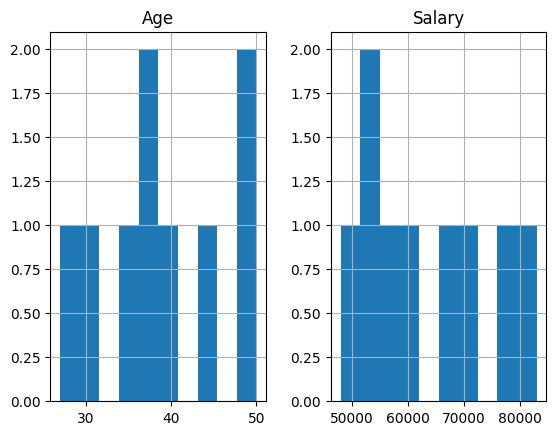

In [ ]:
#Count total number of classes in Data
class_counts = df.groupby('Purchased').size()
print(class_counts)
df.hist()
plt.show()


In [ ]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = df.iloc[:,[0,1,2]].values
# Extracting dependent variable:
y = df.iloc[:, 3].values


In [ ]:
#or use pandas method
x1=df.drop('Purchased',axis=1)
y1=df['Purchased']
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [ ]:
# Taking care of missing data
#handling missing data (Replacing missing data with the mean value)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=1, copy=True)
#Fitting imputer objects to the independent variables x.
imputer = imputer.fit(X[:, 1:3])
#Replacing missing data with the calculated mean value
X[:, 1:3]= imputer.transform(X[:, 1:3])


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


In [ ]:
#using pandas method
df_filled=df.fillna(0)
print(df_filled)


#sklearn.impute.SimpleImputer — scikit-learn 1.4.1 documentation


   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      0.0       Yes
5   France  35.0  58000.0       Yes
6    Spain   0.0  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [ ]:
#dummy encoding.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])],remainder='passthrough')
X=columnTransformer.fit_transform(X)


In [ ]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


In [ ]:


# Splitting the Dataset into the Training set and Test set


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
# Feature Scaling
# Standard Scaling:  Standardization = X'=X-mean(X)/standard deviation
# normal scaling : Normalization= X'=X-min(X)/max(x)-min(X)


from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print(X_train)


[[ 1.         -0.57735027 -0.57735027 -0.7529426  -0.62603778]
 [ 1.         -0.57735027 -0.57735027  1.00845381  1.01304295]
 [ 1.         -0.57735027 -0.57735027  1.79129666  1.83258331]
 [-1.          1.73205081 -0.57735027 -1.73149616 -1.09434656]
 [ 1.         -0.57735027 -0.57735027 -0.36152118  0.42765698]
 [-1.          1.73205081 -0.57735027  0.22561096  0.05040824]
 [-1.         -0.57735027  1.73205081 -0.16581046 -0.27480619]
 [-1.         -0.57735027  1.73205081 -0.01359102 -1.32850095]]
